In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.time import Time
#import astropysics.phot as phot
import math
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
import sys
import numpy as np
import scipy.signal as signal

import scipy
from scipy.stats import linregress
from IPython.display import clear_output

from scipy import stats
import json

In [2]:
def read_file_columns(filename, columns, types=None):
    res = []
    with open(filename, "r") as lines:
        for line in lines:
            if "#" in line:
                continue
            line = line.split()
            l = []
            for i in range(0, len(columns)):
                c = columns[i]
                if types is None:
                    l.append(line[c])
                else:
                    l.append(types[i](line[c]))
            res.append(np.array(l))
    return np.array(res)

In [152]:
### Settings here ###
z, z_label = 1, "073"
#####################

In [153]:
coord = read_file_columns("./coordinates/z%d_%s_coordinates.dat" % (z, z_label), [0, 2, 3], types=[int, float, float])

In [154]:
prop = read_file_columns("./properties/z%d_%s.dat" % (z, z_label), [0, 5, 6, 7], types=[int, float, float, float])

In [155]:
ids = np.intersect1d(coord[:,0], prop[:,0], assume_unique=True)

coord = coord[np.in1d(coord[:,0], ids, assume_unique=True)]
prop = prop[np.in1d(prop[:,0], ids, assume_unique=True)]

In [156]:
all_data=np.concatenate((coord, prop[:,[1,2,3]]), axis=1)
#ID X Y DarkMatter      Stellar Blackhole
# 0 1 2          3            4         5

x = all_data[:,[0, 1, 2]]
subhalos_x = all_data[:,[0, 1, 2]][all_data[:,5] > 0]

In [157]:
subhalos_x.shape

(70392, 3)

In [158]:
x_a = []
for x in coord:
    if x[1] > 0.75 and x[1] < 1 and 0.6 - x[2] > 0.04 and 0.6 - x[2] < 0.18:
        x_a.append(x)
x_a = np.array(x_a)[:,[1,2]]

In [159]:
x_mass = []
for x in subhalos_x:
    if x[1] > 0.75 and x[1] < 1 and 0.6 - x[2] > 0.04 and 0.6 - x[2] < 0.18:
        x_mass.append(x)
x_mass = np.array(x_mass)[:,[1,2]]

In [164]:
f_ids_z0 = np.loadtxt("z%d/filaments_ids_t" % z)
g_ids_z0 = np.loadtxt("z%d/groups_ids_t" % z)
v_ids_z0 = np.loadtxt("z%d/voids_ids_t" %z)
len(f_ids_z0),len(g_ids_z0),len(v_ids_z0)

(8540, 13119, 994)

In [165]:
x_f = coord[:,[1,2]][np.in1d(coord[:,0], f_ids_z0)]
x_g = coord[:,[1,2]][np.in1d(coord[:,0], g_ids_z0)]
x_v = coord[:,[1,2]][np.in1d(coord[:,0], v_ids_z0)]

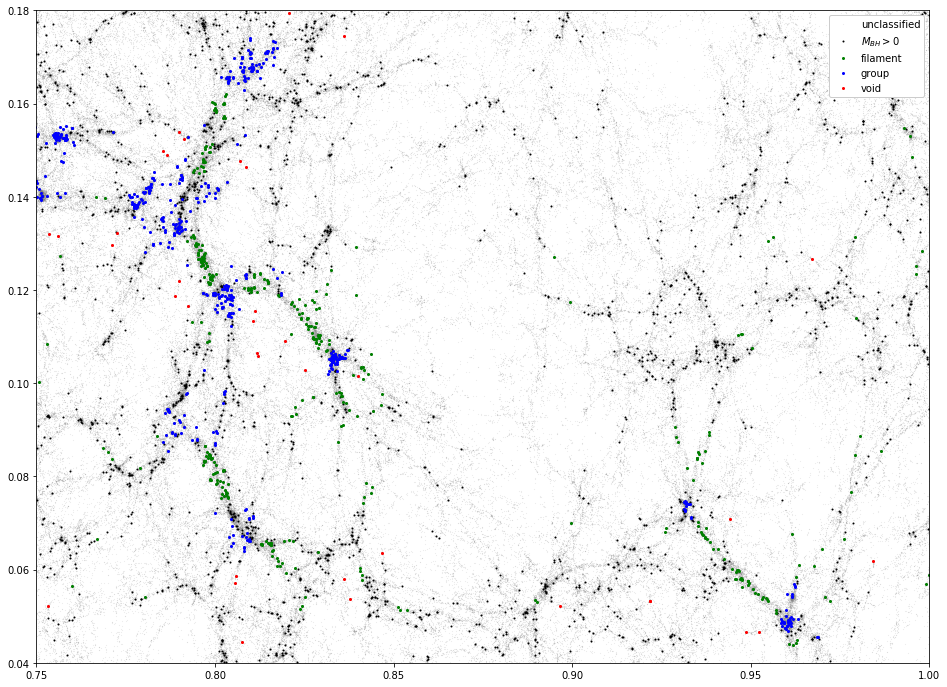

In [166]:
fig, ax = plt.subplots(1, sharex=True, figsize=(16, 12))

#ax.set_title('filaments');
#ax.plot(x_a[:,0],   0.6 - x_a[:,1], '.', color="orange", label="unclassified")
x_a1 = x_a.copy()
#x_a1 = x_a1[0::10]
ax.plot(x_a1[:,0], 0.6 - x_a1[:,1], '.', color="grey", label="unclassified", markersize=0.1)
ax.plot(x_mass[:,0], 0.6 - x_mass[:,1], '.', color="black", label="$M_{BH} > 0$", markersize=2)
ax.plot(x_f[:,0], 0.6 - x_f[:,1], '.', color="green", label="filament", markersize=4)
ax.plot(x_g[:,0], 0.6 - x_g[:,1], '.', color="blue", label="group", markersize=4)
ax.plot(x_v[:,0], 0.6 - x_v[:,1], '.', color="red", label="void", markersize=4)
plt.legend(loc='upper right', fancybox=True, framealpha=1)
ax.set_ylim([0.04, 0.18])
plt.xlim([0.75, 1])
plt.show()